Explained variance ratio (first two components): [ 0.95484052  0.0145449 ]


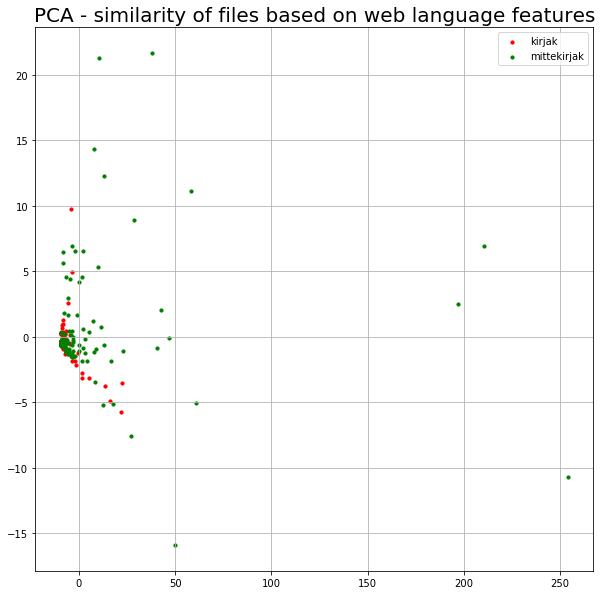

In [5]:
# two components. "word_count" as a feature left out.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.decomposition import PCA

vectors_x=[]
vectors_y=[]
types=[]

with open('weblang_scores.csv','r') as f:
    data=f.readlines()

header, rest=data[0], data[1:]

for i in rest:
    i=i.strip()
    i=i.split(";")
    vectors_x.append(i[3:])
    vectors_y.append(i[1])
    types.append(i[0])
    
X=np.array(vectors_x,dtype=float)
y=np.array(vectors_y) 
y = pd.DataFrame(y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

principalDf = pd.DataFrame(data = X_pca
             , columns = ['component 1', 'component 2'])

finalDf = pd.concat([principalDf, y], axis = 1)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_title('PCA - similarity of files based on web language features', fontsize = 20)
targets = ['kirjak','mittekirjak']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component 1']
               , finalDf.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

plt.show()

Explained variance ratio (first two components): [  9.99965606e-01   3.27715944e-05]


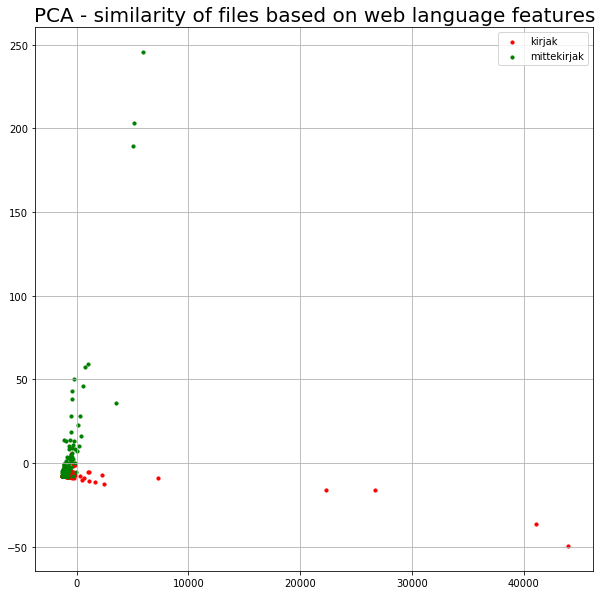

In [4]:
# two components. "word_count" also used as a feature.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.decomposition import PCA

vectors_x=[]
vectors_y=[]
types=[]

with open('weblang_scores.csv','r') as f:
    data=f.readlines()

header, rest=data[0], data[1:]

for i in rest:
    i=i.strip()
    i=i.split(";")
    vectors_x.append(i[2:])
    vectors_y.append(i[1])
    types.append(i[0])
    
X=np.array(vectors_x,dtype=float)
y=np.array(vectors_y) 
y = pd.DataFrame(y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

principalDf = pd.DataFrame(data = X_pca
             , columns = ['component 1', 'component 2'])

finalDf = pd.concat([principalDf, y], axis = 1)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_title('PCA - similarity of files based on web language features', fontsize = 20)
targets = ['kirjak','mittekirjak']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component 1']
               , finalDf.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

plt.show()